# Linear Regression Model with Gradient Descent

> Gradient descent (GD) is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. - [readthedocs](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

The GD function in this notebook acts as an approximate Simple Linear Regression model. The principles and formulas used in this model are found on [readthedocs](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html).

This notebook demonstrates how accurate our model is, by comparing its outputs with the calculated Simple Linear Regression output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x,y,e=.01):
    h = lambda b1,b0,x: b1*x + b0
    theta0 = lambda a,m,h,y: (a/m) * sum(h - y)
    theta1 = lambda a,m,h,x,y: (a/m) * sum((h - y)*x)
    J = lambda m,h,y: (.5*m)*sum((h - y)**2)

    a = 100
    m = x.shape[0]
    theta = np.zeros(2)
    y_0 = h(theta[1],theta[0],x)
    J_0 = J(m,y_0,y)
    r = True

    while r:
        t0 = theta[0] - theta0(a,m,y_0,y)
        t1 = theta[1] - theta1(a,m,y_0,x,y)
        y_pred = h(t1,t0,x)
        J_1 = J(m,y_pred,y)
        if (J_1 >= J_0): a /= 10
        else: r = False

    while J(m,y_pred,y) > e*J_0:
        theta[1] -= theta1(a,m,y_pred,x,y)
        theta[0] -= theta0(a,m,y_pred,y)
        y_pred = h(theta[1],theta[0],x)
    else:
        return theta

Our model uses the argument `e`, which is the **error rate**. It is the level of error in the **loss function $J(\theta)$** comparing to $J(\theta = 0)$, which lets the computer know when to stop the algorithm.

Let's use the [Wikipedia's American Women example](https://en.wikipedia.org/wiki/Simple_linear_regression#Numerical_example) to demonstrate our model's accuracy.

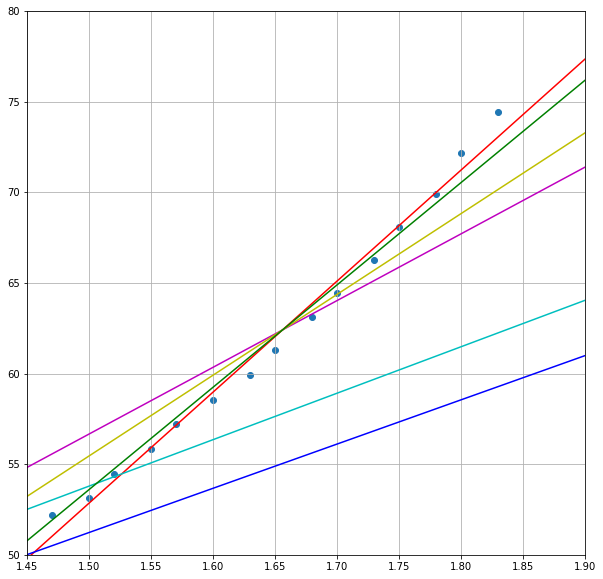

In [2]:
x = np.array([1.47,1.50,1.52,1.55,1.57,1.60,1.63,1.65,1.68,1.70,1.73,1.75,1.78,1.80,1.83])
y = np.array([52.21,53.12,54.48,55.84,57.20,58.57,59.93,61.29,63.11,64.47,66.28,68.10,69.92,72.19,74.46])
X = np.linspace(.9*min(x),1.1*max(x),num=2)
Y = 61.272*X -39.062
plt.figure(figsize=(10,10))
plt.plot(X,Y,'r',label='Regression Line')
test_vals = [1/50,1/100,1/500,1/1000,1/5000]
for i in test_vals:
    c = {test_vals[0]:'b',test_vals[1]:'c',test_vals[2]:'m',test_vals[3]:'y',test_vals[4]:'g'}
    theta = gradient_descent(x,y,e=i)
    Y2 = theta[1]*X + theta[0]
    plt.plot(X,Y2,c[i],label='GD Line')
plt.scatter(x,y)
plt.xlim(left=1.45,right=1.9)
plt.ylim(bottom=50,top=80)
plt.grid()
plt.show()

The <font color="red">red</font> line shows the accurate regression line, while the <font color="blue">blue</font>, <font color="cyan">cyan</font>, <font color="purple">purple</font>, <font color="#CCCC00">yellow</font> and <font color="green">green</font> lines show our model's ouputs at `e` equal to $\cfrac{1}{50}, \cfrac{1}{100}, \cfrac{1}{500}, \cfrac{1}{1000}, \cfrac{1}{5000}$ consecutively.

As we decrease the **error rate**, our model apparently becomes more accurate, as the model line tilts closer towards the regression line, with the <font color="green">green</font> line being the most accurate at `e = 1/5000`.

The end.